In [1]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [4]:
file_path = 'C:/Users/amber/OneDrive/Desktop/cs455_homework2_data_casey_lacey_mcnamara.csv'
data = pd.read_csv(file_path)

In [5]:
# Selecting only the required columns
selected_data = data[['Purchase Amount (USD)', 'Previous Purchases']]

In [6]:
# Normalize the selected columns to range [0, 100]
scaler = MinMaxScaler(feature_range=(0, 100))
normalized_data_int = pd.DataFrame(scaler.fit_transform(selected_data), columns=selected_data.columns)

In [7]:
# Save the processed dataset to a new CSV file
output_file_path = 'C:/Users/amber/OneDrive/Desktop/cs455_homework3_data_casey_lacey_mcnamara.csv'
normalized_data_int.to_csv(output_file_path, index=False)

In [8]:
X = normalized_data_int.to_numpy()

In [15]:
# Set random seed for reproducibility
np.random.seed(42)

In [17]:
def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

def calculate_sse(X, clusters, centroids):
    sse = 0
    for i, point in enumerate(X):
        centroid = centroids[clusters[i]]
        # Using squared Manhattan distance for consistency with the concept of SSE
        sse += manhattan_distance(point, centroid) ** 2
    return sse

def k_medians(X, k=3, max_iters=100):
    # Randomly initialize centroids
    indices = np.random.choice(np.arange(len(X)), k, replace=False)
    centroids = X[indices]
    iteration_count = 0
    
    for iteration in range(max_iters):
        # Count the total iterations
        iteration_count += 1
        # Assign clusters based on Manhattan distance
        distances = np.array([[manhattan_distance(x, centroid) for centroid in centroids] for x in X])
        clusters = np.argmin(distances, axis=1)
        
        # Update centroids (median)
        new_centroids = np.array([np.median(X[clusters == i], axis=0) for i in range(k)])
        
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    # Calculate SSE using squared Manhattan distances
    sse = calculate_sse(X, clusters, centroids)
    return clusters, centroids, sse, iteration_count

In [19]:
# Perform initial clustering with max_iters set to 1 for the first loop visualization
clusters_initial, centroids_initial, sse_initial, iter_initial = k_medians(X, k=3, max_iters=1)

In [21]:
# Show cluster members after first loop
print("Initial Cluster Members:")
for i in range(3):  
    members = np.where(clusters_initial == i)[0]
    print(f"Cluster {i+1}: {members.tolist()}")

Initial Cluster Members:
Cluster 1: [0, 1, 2, 3, 4, 6, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 51, 54, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81, 83, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
Cluster 2: [5, 24, 26, 45, 50, 52, 53, 55, 62]
Cluster 3: [7, 9, 10, 25, 30, 49, 70, 72, 82, 84]


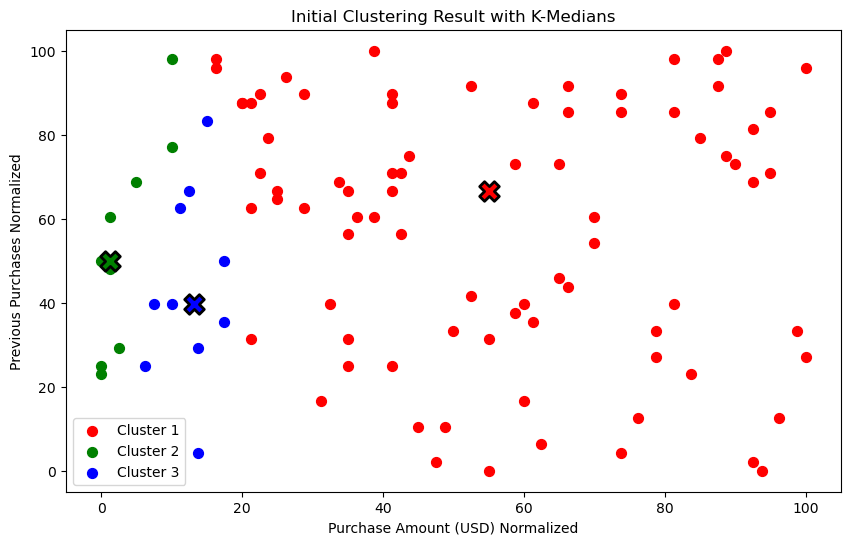

In [23]:
# Visualization of initial clustering
colors = ['r', 'g', 'b']
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.scatter(X[clusters_initial == i, 0], X[clusters_initial == i, 1], s=50, color=colors[i], label=f'Cluster {i+1}')
    plt.scatter(centroids_initial[i, 0], centroids_initial[i, 1], s=200, color=colors[i], marker='X', edgecolor='k', linewidth=2)
plt.title('Initial Clustering Result with K-Medians')
plt.xlabel('Purchase Amount (USD) Normalized')
plt.ylabel('Previous Purchases Normalized')
plt.legend()
plt.show()

In [25]:
print("Initial SSE using squared Manhattan distances:", sse_initial)

Initial SSE using squared Manhattan distances: 232145.22569444447


In [27]:
# Perform final clustering until convergence
clusters_final, centroids_final, sse_final, total_iterations = k_medians(X, k=3, max_iters=100)

In [29]:
# Display final cluster members
print("\nFinal Cluster Members:")
for i in range(3):
    members = np.where(clusters_final == i)[0]
    print(f"Cluster {i+1}: {members.tolist()}")


Final Cluster Members:
Cluster 1: [3, 6, 12, 19, 23, 28, 31, 32, 34, 36, 40, 54, 56, 63, 73, 78, 79, 81, 93, 95, 96, 97]
Cluster 2: [0, 1, 2, 5, 8, 9, 11, 15, 18, 21, 25, 26, 27, 29, 37, 39, 42, 43, 51, 57, 59, 61, 64, 66, 69, 74, 75, 80, 85, 89, 91, 92, 94, 98]
Cluster 3: [4, 7, 10, 13, 14, 16, 17, 20, 22, 24, 30, 33, 35, 38, 41, 44, 45, 46, 47, 48, 49, 50, 52, 53, 55, 58, 60, 62, 65, 67, 68, 70, 71, 72, 76, 77, 82, 83, 84, 86, 87, 88, 90, 99]


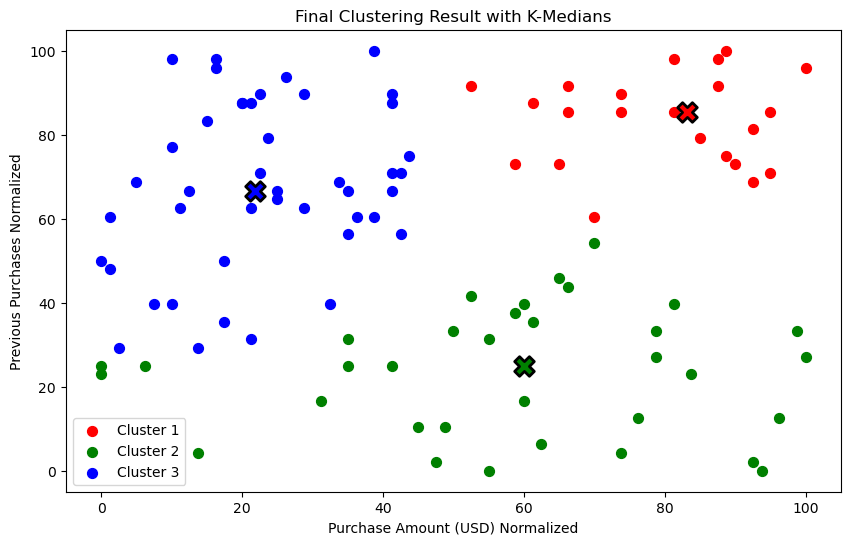

In [31]:
# Visualization of final clustering
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.scatter(X[clusters_final == i, 0], X[clusters_final == i, 1], s=50, color=colors[i], label=f'Cluster {i+1}')
    plt.scatter(centroids_final[i, 0], centroids_final[i, 1], s=200, color=colors[i], marker='X', edgecolor='k', linewidth=2)
plt.title('Final Clustering Result with K-Medians')
plt.xlabel('Purchase Amount (USD) Normalized')
plt.ylabel('Previous Purchases Normalized')
plt.legend()
plt.show()

In [33]:
print("\nFinal SSE using squared Manhattan distances:", sse_final)


Final SSE using squared Manhattan distances: 94220.92013888886


In [35]:
print("Total number of iterations:", total_iterations)

Total number of iterations: 6
